# sklearn
This is a machine learning library.

## Setup (hidden)

In [54]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:75% !important; margin-left:350px; }</style>"))
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
pd.set_option( 'display.notebook_repr_html', False)  # render Series and DataFrame as text, not HTML
pd.set_option( 'display.max_column', 10)    # number of columns
pd.set_option( 'display.max_rows', 10)     # number of rows
pd.set_option( 'display.width', 90)        # number of characters per row

import matplotlib.pyplot as plt

## The Library
sklearn **does not automatically import its subpackages**. Therefore all subpakcages must be specifically loaded before use.

In [93]:
# Sample Data
from sklearn                 import datasets

# Model Selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_validate

# Preprocessing
from sklearn.preprocessing   import Imputer
from sklearn.preprocessing   import MinMaxScaler
from sklearn.preprocessing   import StandardScaler
from sklearn.preprocessing   import Normalizer
from sklearn.preprocessing   import PolynomialFeatures

# Model and Pipeline
from sklearn.linear_model    import LinearRegression,Lasso
from sklearn.pipeline        import make_pipeline

# Measurement
from sklearn.metrics         import *

import statsmodels.formula.api as smf

## Built-in Datasets
sklearn included some popular datasets to play with  
Each dataset is of type **Bunch**.   
It has useful data (array) in the form of properties:  
- keys (display all data availabe within the dataset)  
- data (common)  
- target (common)  
- DESCR (common)
- feature_names (some dataset)  
- target_names  (some dataset) 
- images (some dataset)

### diabetes (regression)

#### Load Dataset

In [37]:
diabetes = datasets.load_diabetes()
print (type(diabetes))

<class 'sklearn.utils.Bunch'>


#### keys

In [34]:
diabetes.keys()

dict_keys(['data', 'target', 'DESCR', 'feature_names'])

#### Features and Target
.data   = features  - two dimension array  
.target = target    - one dimension array 

In [25]:
print (type(diabetes.data))
print (type(diabetes.target))
print (diabetes.data.shape)
print (diabetes.target.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(442, 10)
(442,)


#### Load with X,y (Convenient Method)
using return_X_y = True, data is loaded into X, target is loaded into y

In [38]:
X,y      = datasets.load_diabetes(return_X_y=True)

In [36]:
print (X.shape)
print (y.shape)

(442, 10)
(442,)


### digits (Classification)
This is a copy of the test set of the UCI ML hand-written digits datasets

In [47]:
digits = datasets.load_digits()
print (type(digits))
print (type(digits.data))

<class 'sklearn.utils.Bunch'>
<class 'numpy.ndarray'>


In [49]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [91]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

#### data

In [41]:
digits.data.shape  # features

(1797, 64)

In [43]:
digits.target.shape # target

(1797,)

#### Images
- images is 3 dimensional array  
- There are **1797 samples**, each sample is **8x8 pixels**

In [68]:
digits.images.shape

(1797, 8, 8)

In [70]:
type(digits.images)

numpy.ndarray

**Each element represent the data that make its target**

4
[[  0.   0.   0.   2.  13.   0.   0.   0.]
 [  0.   0.   0.   8.  15.   0.   0.   0.]
 [  0.   0.   5.  16.   5.   2.   0.   0.]
 [  0.   0.  15.  12.   1.  16.   4.   0.]
 [  0.   4.  16.   2.   9.  16.   8.   0.]
 [  0.   0.  10.  14.  16.  16.   4.   0.]
 [  0.   0.   0.   0.  13.   8.   0.   0.]
 [  0.   0.   0.   0.  13.   6.   0.   0.]]


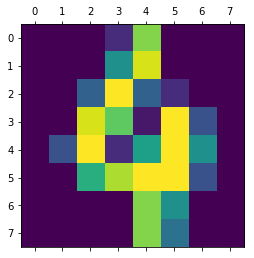

In [84]:
print (digits.target[100])
print (digits.images[100])
plt.matshow(digits.images[100]) 

#### Loading Into X,y (Convenient Method)

In [44]:
X,y = datasets.load_digits(return_X_y=True)

In [45]:
X.shape

(1797, 64)

In [46]:
y.shape

(1797,)

### iris (Classification)

In [85]:
iris = datasets.load_iris()

In [86]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

#### Feature Names

In [87]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

#### target

In [88]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'],
      dtype='<U10')

In [89]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Model Fitting

![split](img/fitting.png)

### Underfitting
- The model does not fit the training data and therefore misses the trends in the data
- The model cannot be generalized to new data, this is usually the result of a very simple model (not enough predictors/independent variables)
- The model will have poor predictive ability
- For example, we fit a linear model (like linear regression) to data that is not linear

### Overfitting
- The model has trained “too well” and is now, well, fit too closely to the training dataset
- The model is too complex (i.e. **too many features/variables** compared to the number of observations)
- The model will be very accurate on the training data but will probably be very not accurate on untrained or new data
- The model is not generalized (or not AS generalized), meaning you can generalize the results 
- The model learns or describes the “noise” in the training data instead of the actual relationships between variables in the data

### Just Right
- It is worth noting the underfitting is not as prevalent as overfitting
- Nevertheless, we want to avoid both of those problems in data analysis
- We want to find the middle ground between under and overfitting our model

## Model Tuning
- A highly complex model tend to overfit
- A too flexible model tend to underfit

Complexity can be reduced by: 
- Less features
- Less degree of polynomial features
- Apply generalization (tuning hyperparameters)

![split](img/model_complexity.jpg)

## High Level ML Process

![split](img/scikit_learn_split.jpg)

## Train Test Data Splitting

### Sample Data
Generate 100 rows of data, with 3x features (X1,X2,X3), and one dependant variable (Y)

In [265]:
n = 21  # number of samples
I = 5  # intercept value
E = np.random.randint( 1,20, n)  # Error
x1 = np.random.randint( 1,n+1, n)
x2 = np.random.randint( 1,n+1, n)
x3 = np.random.randint( 1,n+1, n)
y = 0.1*x1 + 0.2*x2 + 0.3*x3 + E + I
mydf = pd.DataFrame({
    'y':y,
    'x1':x1,
    'x2':x2,
    'x3':x3
})
mydf.shape

(21, 4)

### One Time Split

sklearn::train_test_split() has two forms:
- Take one DF, split into 2 DF (most of sklearn modeling use this method
- Take two DFs, split into 4 DF

In [266]:
mydf.head()

   x1  x2  x3     y
0  10  17  12  21.0
1  12   5   9  16.9
2  18  13   2  27.0
3  11  19  17  22.0
4  18  13  10  24.4

#### Method 1: Split One Dataframe Into Two (Train & Test)

```
traindf, testdf = train_test_split( df, test_size=, random_state= ) 
 # random_state : seed number (integer), optional
 # test_size    : fraction of 1, 0.2 means 20%
```

![split](img/train_test_split_1.jpg)

In [267]:
traindf, testdf = train_test_split(mydf,test_size=0.2, random_state=25)

In [268]:
print (len(traindf))
print (len(testdf))

16
5


#### Method 2: Split Two DataFrame (X,Y) into Four x_train/test, y_train/test
```
x_train, x_test, y_train, y_test = train_test_split( X,Y, test_size=, random_state= )
 # random_state : seed number (integer), optional
 # test_size    : fraction of 1, 0.2 means 20%
```

![split](img/train_test_split_2.jpg)

**Split DataFrame into X and Y First**

In [269]:
feature_cols = ['x1','x2','x3']
X = mydf[feature_cols]
Y = mydf.y

**Then Split X/Y into x_train/test, y_train/test**

In [270]:
x_train, x_test, y_train, y_test = train_test_split( X,Y, test_size=0.2, random_state=25)
print (len(x_train))
print (len(x_test))

16
5


### K-Fold
```
KFold(n_splits=3, shuffle=False, random_state=None)
```

![split](img/kfold.jpg)

**suffle=False** (default), meaning index number is taken continously

In [271]:
kf = KFold(n_splits=7)

In [272]:
for train_index, test_index in kf.split(X):
  print (train_index, test_index)

[ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] [0 1 2]
[ 0  1  2  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] [3 4 5]
[ 0  1  2  3  4  5  9 10 11 12 13 14 15 16 17 18 19 20] [6 7 8]
[ 0  1  2  3  4  5  6  7  8 12 13 14 15 16 17 18 19 20] [ 9 10 11]
[ 0  1  2  3  4  5  6  7  8  9 10 11 15 16 17 18 19 20] [12 13 14]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 18 19 20] [15 16 17]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17] [18 19 20]


**shuffle=True**

In [273]:
kf = KFold(n_splits=7, shuffle=True)

In [274]:
for train_index, test_index in kf.split(X):
  print (train_index, test_index)

[ 0  2  4  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] [1 3 5]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 15 17 18 19 20] [13 14 16]
[ 0  1  2  3  4  5  6  9 10 11 12 13 14 15 16 17 19 20] [ 7  8 18]
[ 0  1  2  3  4  5  6  7  8  9 10 12 13 14 16 17 18 20] [11 15 19]
[ 1  2  3  4  5  6  7  8  9 11 13 14 15 16 17 18 19 20] [ 0 10 12]
[ 0  1  2  3  5  6  7  8  9 10 11 12 13 14 15 16 18 19] [ 4 17 20]
[ 0  1  3  4  5  7  8 10 11 12 13 14 15 16 17 18 19 20] [2 6 9]


### Leave One Out

- For a dataset of N rows, Leave One Out will split N-1 times, each time leaving one row as test, remaning as training set.  
- Due to the **high number of test sets** (which is the same as the number of samples-1) this cross-validation method can be very costly. For large datasets one should favor KFold.

In [275]:
loo = LeaveOneOut()

In [276]:
for train_index, test_index in loo.split(X):
  print (train_index, test_index)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] [0]
[ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] [1]
[ 0  1  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] [2]
[ 0  1  2  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] [3]
[ 0  1  2  3  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] [4]
[ 0  1  2  3  4  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] [5]
[ 0  1  2  3  4  5  7  8  9 10 11 12 13 14 15 16 17 18 19 20] [6]
[ 0  1  2  3  4  5  6  8  9 10 11 12 13 14 15 16 17 18 19 20] [7]
[ 0  1  2  3  4  5  6  7  9 10 11 12 13 14 15 16 17 18 19 20] [8]
[ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20] [9]
[ 0  1  2  3  4  5  6  7  8  9 11 12 13 14 15 16 17 18 19 20] [10]
[ 0  1  2  3  4  5  6  7  8  9 10 12 13 14 15 16 17 18 19 20] [11]
[ 0  1  2  3  4  5  6  7  8  9 10 11 13 14 15 16 17 18 19 20] [12]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 14 15 16 17 18 19 20] [13]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 20] [14]
[ 0  

In [277]:
X

    x1  x2  x3
0   10  17  12
1   12   5   9
2   18  13   2
3   11  19  17
4   18  13  10
..  ..  ..  ..
16  20  13  18
17   1  17   1
18  13  20  18
19  11   4  15
20   6   2  10

[21 rows x 3 columns]

## Polynomial Transform
This can be used as part of feature engineering, to introduce new features for data that seems to fit with quadradic model.

### Single Variable

#### Sample Data
Data must be 2-D before polynomial features can be applied. Code below convert 1D array into 2D array.

In [278]:
x = np.array([1, 2, 3, 4, 5])
X = x[:,np.newaxis]
X

array([[1],
       [2],
       [3],
       [4],
       [5]])

#### Degree 1
One Degree means maintain original features. No new features is created.

In [279]:
PolynomialFeatures(degree=1, include_bias=False).fit_transform(X)

array([[ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.]])

#### Degree 2
Degree-1 original   feature:  x  
Degree-2 additional features:  x^2  

In [280]:
PolynomialFeatures(degree=2, include_bias=False).fit_transform(X)

array([[  1.,   1.],
       [  2.,   4.],
       [  3.,   9.],
       [  4.,  16.],
       [  5.,  25.]])

#### Degree 3
Degree-1 original   feature:  x  
Degree-2 additional features:  x^2  
Degree-3 additional features:  x^3

In [281]:
PolynomialFeatures(degree=3, include_bias=False).fit_transform(X)

array([[   1.,    1.,    1.],
       [   2.,    4.,    8.],
       [   3.,    9.,   27.],
       [   4.,   16.,   64.],
       [   5.,   25.,  125.]])

#### Degree 4
Degree-1 original   feature:  x  
Degree-2 additional features:  x^2  
Degree-3 additional features:  x^3  
Degree-3 additional features:  x^4

In [282]:
PolynomialFeatures(degree=4, include_bias=False).fit_transform(X)

array([[   1.,    1.,    1.,    1.],
       [   2.,    4.,    8.,   16.],
       [   3.,    9.,   27.,   81.],
       [   4.,   16.,   64.,  256.],
       [   5.,   25.,  125.,  625.]])

### Two Variables

#### Sample Data

In [283]:
X = pd.DataFrame( {'x1': [1, 2, 3, 4, 5 ],
                   'x2': [6, 7, 8, 9, 10]})
X

   x1  x2
0   1   6
1   2   7
2   3   8
3   4   9
4   5  10

#### Degree 2
```
Degree-1 original   features:  x1,     x2  
Degree-2 additional features:  x1^2,   x2^2,   x1:x2 
```

In [284]:
PolynomialFeatures(degree=2, include_bias=False).fit_transform(X)

array([[   1.,    6.,    1.,    6.,   36.],
       [   2.,    7.,    4.,   14.,   49.],
       [   3.,    8.,    9.,   24.,   64.],
       [   4.,    9.,   16.,   36.,   81.],
       [   5.,   10.,   25.,   50.,  100.]])

#### Degree 3
```
Degree-1 original   features:  x1,       x2  
Degree-2 additional features:  x1^2,     x2^2,   x1:x2 
Degree-3 additional features:  x1^3,     x2^3    x1:x2^2    x2:x1^2
```

In [285]:
PolynomialFeatures(degree=3, include_bias=False).fit_transform(X)

array([[    1.,     6.,     1.,     6.,    36.,     1.,     6.,    36.,
          216.],
       [    2.,     7.,     4.,    14.,    49.,     8.,    28.,    98.,
          343.],
       [    3.,     8.,     9.,    24.,    64.,    27.,    72.,   192.,
          512.],
       [    4.,     9.,    16.,    36.,    81.,    64.,   144.,   324.,
          729.],
       [    5.,    10.,    25.,    50.,   100.,   125.,   250.,   500.,
         1000.]])

## Imputation of Missing Data

### Sample Data

In [286]:
from numpy import nan
X = np.array([[ nan, 0,   3  ],
              [ 3,   7,   9  ],
              [ 3,   5,   2  ],
              [ 4,   nan, 6  ],
              [ 8,   8,   1  ]])

y = np.array([14, 16, -1,  8, -5])

In [287]:
imp = Imputer(strategy='mean')
X2 = imp.fit_transform(X)
X2

array([[ 4.5,  0. ,  3. ],
       [ 3. ,  7. ,  9. ],
       [ 3. ,  5. ,  2. ],
       [ 4. ,  5. ,  6. ],
       [ 8. ,  8. ,  1. ]])

## Scaling

It is possible that some insignificant variable with larger range will be dominating the objective function.  
We can remove this problem by scaling down all the features to a same range.

### Sample Data

In [288]:
X=mydf.filter(like='x')[:5]
X

   x1  x2  x3
0  10  17  12
1  12   5   9
2  18  13   2
3  11  19  17
4  18  13  10

### MinMax Scaler

```
MinMaxScaler( feature_range(0,1), copy=True )
# default feature range (output result) from 0 to 1
# default return a copy of new array, copy=False will inplace original array
```

**Define Scaler Object**

In [289]:
scaler = MinMaxScaler()

**Transform Data**

In [290]:
scaler.fit_transform(X)

array([[ 0.        ,  0.85714286,  0.66666667],
       [ 0.25      ,  0.        ,  0.46666667],
       [ 1.        ,  0.57142857,  0.        ],
       [ 0.125     ,  1.        ,  1.        ],
       [ 1.        ,  0.57142857,  0.53333333]])

**Scaler Attributes**  
```
data_min_: minimum value of the feature (before scaling)  
data_max_: maximum value of the feature (before scaling)  
```

In [291]:
pd.DataFrame(list(zip(scaler.data_min_, scaler.data_max_)), 
             columns=['data_min','data_max'], 
             index=X.columns)

    data_min  data_max
x1      10.0      18.0
x2       5.0      19.0
x3       2.0      17.0

### Standard Scaler

It is most suitable for techniques that assume a Gaussian distribution in the input variables and work better with rescaled data, such as linear regression, logistic regression and linear discriminate analysis.

```
StandardScaler(copy=True, with_mean=True, with_std=True)
# copy=True : return a copy of data, instead of inplace
# with_mean=True : centre all features by substracting with its mean
# with_std=True  : centre all features by dividing with its std
```

**Define Scaler Object**

In [292]:
scaler = StandardScaler()

**Transform Data**

In [293]:
scaler.fit_transform(X)

array([[-1.08972474,  0.75      ,  0.41169348],
       [-0.5161854 , -1.75      , -0.20584674],
       [ 1.2044326 , -0.08333333, -1.64677394],
       [-0.80295507,  1.16666667,  1.4409272 ],
       [ 1.2044326 , -0.08333333,  0.        ]])

**Scaler Attributes**  
After the data transformation step above, scaler will have the mean and variance information for each feature.

In [294]:
pd.DataFrame(list(zip(scaler.mean_, scaler.var_)), 
             columns=['mean','variance'], 
             index=X.columns)

    mean  variance
x1  13.8     12.16
x2  13.4     23.04
x3  10.0     23.60

## Pipeline

With any of the preceding examples, it can quickly become tedious to do the transformations by hand, especially if you wish to string together multiple steps. For example, we might want a processing pipeline that looks something like this:

- **Impute** missing values using the mean  
- **Transform** features to quadratic  
- **Fit** a linear regression  

**make_pipeline** takes list of functions as parameters. When calling **fit()** on a pipeline object, these functions will be performed in sequential with data flow from one function to another.

```
make_pipeline (
    function_1 (),
    function_2 (),
    function_3 ()
 )
```

### Sample Data

In [295]:
X

   x1  x2  x3
0  10  17  12
1  12   5   9
2  18  13   2
3  11  19  17
4  18  13  10

In [296]:
y

array([14, 16, -1,  8, -5])

### Create Pipeline

In [297]:
my_pipe = make_pipeline (
    Imputer            (strategy='mean'),
    PolynomialFeatures (degree=2),
    LinearRegression   ()
)
type(my_pipe)

sklearn.pipeline.Pipeline

In [298]:
my_pipe

Pipeline(memory=None,
     steps=[('imputer', Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)), ('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

### Executing Pipeline

In [299]:
my_pipe.fit( X, y) # execute the pipeline
print (y)
print (my_pipe.predict(X))

[14 16 -1  8 -5]
[ 14.  16.  -1.   8.  -5.]


In [300]:
type(my_pipe)

sklearn.pipeline.Pipeline

## Cross Validation

### Load Data

In [146]:
X,y = datasets.load_diabetes(return_X_y=True)

### Choose An Cross Validator

In [147]:
kf = KFold(n_splits=5)

### Run Cross Validation

**Single Scorer**  
Use default scorer of the estimator (if available)

In [148]:
lasso = Lasso()
cv_results1 = cross_validate(lasso, X,y,cv=kf,
    return_train_score=False)

**Multiple Scorer**  
Specify the scorer
http://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

In [149]:
cv_results2 = cross_validate(lasso, X,y,cv=kf,
    scoring=("neg_mean_absolute_error","neg_mean_squared_error","r2"),
    return_train_score=False)

### The Result
Result is a **dictionary**

In [150]:
cv_results1.keys()

dict_keys(['fit_time', 'score_time', 'test_score'])

In [151]:
cv_results2.keys()

dict_keys(['fit_time', 'score_time', 'test_neg_mean_absolute_error', 'test_neg_mean_squared_error', 'test_r2'])

In [152]:
cv_results1

{'fit_time': array([ 0.0009973 ,  0.        ,  0.        ,  0.00099802,  0.        ]),
 'score_time': array([ 0.        ,  0.        ,  0.00100255,  0.        ,  0.0010004 ]),
 'test_score': array([ 0.28349047,  0.35157959,  0.3533813 ,  0.33481474,  0.36453281])}

In [153]:
cv_results2

{'fit_time': array([ 0.00099897,  0.        ,  0.        ,  0.00099826,  0.0010004 ]),
 'score_time': array([ 0.00100064,  0.00100303,  0.00099969,  0.00099945,  0.        ]),
 'test_neg_mean_absolute_error': array([-50.09003423, -52.54110842, -55.02813846, -50.81121806, -55.60471593]),
 'test_neg_mean_squared_error': array([-3491.74009759, -4113.86002091, -4046.91780932, -3489.74018715,
        -4111.92401769]),
 'test_r2': array([ 0.28349047,  0.35157959,  0.3533813 ,  0.33481474,  0.36453281])}